# Image Preprocessing Framework for PCB Defect Detection<br>
![System Test Engineering Logo](related/logo_fhj_stm.jpg)<br>
---

**Master's Degree Project in System Test Engineering**  
**FH JOANNEUM - University of Applied Sciences**

---

**Author:** Luis Kraker  
**Supervisor:** DDr. Gudrun Schappacher-Tilp  
**Date:** 10<sup>th</sup> December, 2023    

---

## Foreword
This document is part of my ongoing PCB defect detection project for my master's degree in System Test Engineering at FH JOANNEUM. The project will be part of the ENDLESS initiative (Enabling Dependable Embedded Systems), which is supported by the Austrian Research Promotion Agency through the COIN program. This document focuses on the image preprocessing framework that I created for this project. It aims to provide detailed information about the framework's code structure and features.

I am receiving ongoing and valuable guidance from Ms. Schappacher, a senior lecturer at FH JOANNEUM, in developing the software solutions that are a crucial part of this framework. The document, presented as an interactive Jupyter notebook, includes not just text but also links to software modules and live demonstrations.

It is important to note that this document focuses solely on the image preprocessing framework of the project and does not cover any aspects of the PCB defect detection model, which is still in development. Finally, because I am eager to grow in my technical expertise, I am open to any feedback that can contribute to my overall development in this area.


---

## Contents
1. [Introduction to the PCB Defect Detection Project](#1-introduction-to-the-pcb-defect-detection-project)
1. [The Role of Image Preprocessing](#2-the-role-of-image-preprocessing)
1. [Preprocessing Experiences](#3-preprocessing-experiences)
1. [Inspiration and Framework Conceptualization](#4-inspiration-and-framework-conceptualization)
1. [Interactive Exploration of the Image Preprocessor](#5-interactive-exploration-of-the-image-preprocessor)
1. [Code Framework Overview](#6-code-framework-overview)
1. [Understanding the ImagePreprocessor Class](#7-understanding-the-imagepreprocessor-class)
1. [Understanding the StepBase Class](#8-understanding-the-stepbase-class)
1. [Constructing Custom Preprocessing Step](#9-constructing-custom-preprocessing-step)
1. [Serialization of the Pipeline with JSON](#10-serialization-of-the-pipeline-with-json)
1. [Understanding the ClassInstancesSerializer](#11-understanding-the-classinstancesserializer)
1. [Conclusion and Further Steps](#12-conclusion-and-further-steps)
1. [Author's Q&A](#authors-qa)
1. [References](#references)

<a id='Chapter1'></a>

---

## 1. Introduction to the PCB Defect Detection Project
Printed Circuit Boards (PCBs) are critical components of electronic devices, but detecting defects during production is difficult. These flaws can have an impact on device performance and safety, making detection a critical step.[[1]](#references) Through Machine Learning (ML), the hope is to improve this detection process.

While traditional methods of inspecting PCBs, such as Automatic Optical Inspection (AOI) systems, are used, they frequently struggle with the complexity of modern PCB designs, resulting in false positives—incorrectly marking good areas as defective.[[1]](#references) This challenge underscores the importance of the ML approach, which requires the availability of high-quality image data suitable for effective machine learning.

**Stages of the PCB Defect Detection Framework** 

The PCB defect detection framework includes the following key stages:

- Identifying Defect Types: Specifying the types of defects to look for.

- Image Preprocessing: Collecting and preparing images in preparation for model.

- Model Development: creating an ML model for exact defect detection in PCBs.

- Model optimization: is about training the model with high-quality data in order to validate accuracy and reduce false positives.

The structure of the previously outlined framework shows the critical phases for developing the PCB defect detection tool. Given the model's dynamic nature, which may necessitate optimization, retraining with new data, adjustments for detecting different defect types, or producing different outputs, these stages are expected to be cyclical. This iterative approach highlights the significance of continuous improvement response to readapted detection requirements. This is why a solid test framework is desired to make these cycles easier, while ensuring the tool's effectiveness and functionality when changes are made.

**Focus of this Documention**

The focus of this documentation is the Image Preprocessing Project Framework, an important component in preparing images for analysis by the PCB defect detector model.  Image preprocessing involves transforming raw image data into a format that is not only standardized but also optimized for compatibility with ML models. It entails filtering the images, maintaining consistency, and bringing them up to a quality from which the machine learning model may effectively learn.[[2]](#references)


---

<a id='Chapter2'></a>
## 2. The Role of Image Preprocessing
When working with images in the ML process, image preprocessing is a critical stage. It's not only about getting the images ready; it's also about making sure they're in good enough condition for the models to learn from. Here are the main reasons on why it is critical:

- Formatting and standardization: Images must be correctly formatted before being fed into a ML model. This includes ensuring that their colors are altered as needed, positioned correctly, and that they are all the same size. Convolutional Neural Networks (CNNs) require this since their layers expect uniformly sized inputs.[[2]](#references)

- Quality improvement: Good preprocessing aids in extracting the relevant features of an image from which the model must learn. Preprocessing seeks to improve image data by improving specific visual attributes that are crucial for subsequent processing and analysis activities or suppressing undesired distortions.[[3]](#references) The goal is to enhance the quality of the data so that the model can deal with it more effectively. Just as numbers are normalized and standardized in other ML Solutions, image preprocessing ensures that the model sees the images in a way that allows it to learn quickly and effectively.[[4]](#references)

- Efficiency and speed: When images are properly preprocessed, everything else in the machine learning process may move more quickly. Training models can take less time, and predictions can be made more quickly. This is especially significant when a large number of images exists to sort through because it allows us to accomplish more in less time.[[2]](#references)

In summary, preprocessing is suggested, not only for PCB defect detection, but also for any other image-based ML project. It improves the model's performance, provides faster results, and guarantees that the learning process runs smoothly.


---

<a id='Chapter3'></a>
## 3. Preprocessing Experiences
At the beginning of my journey to develope a framework for PCB defect detection using ML, I created a dedicated Jupyter Notebook called [image_preprocessing_evaluation.ipynb](./image_preprocessing_evaluation.ipynb). This notebook was used to evaluate multiple image preprocessing procedures, each aiming to enhance the quality of PCB images for improved defect detection.

**Key Preprocessing Steps Investigated**

1. Histogram Equalization: Balances image contrast.
1. Noise Reduction: Clears up image clarity.
1. Grayscale Conversion: Simplifies image complexity.
1. Resizing: Standardizes image dimensions.
1. Perspective Correction: Aligns image orientation (work in progress).
1. Thresholding: Enhances specific image features.
1. Morphological Operations: Attempts to refine image texture (results were mixed).
1. Normalization: Adjusts pixel value scales.
1. Standardization: Aims for uniform pixel values (found redundant after Thresholding or Normalization).

**Evaluation Method**

For evaluating these preprocessing steps, the Kaggle PCB Defect Dataset [[5]](#references) was utilized.
The TensorFlow framework was used to handle the image collection efficiently.
I included in the TensorFlow framework built-in image preprocessing routines from OpenCV (cv2), allowing for easy application of preprocessing stages.

**Realizations and insights**

While working on the notebook, I became aware of the vast number of potential image preprocessing combinations and parameters. This highlighted the need for having a flexible and robust framework in place to rapidly experiment with and assess different preprocessing steps combinations. The global histogram equalization stage was a prime example (see code snippet above). The preprocessing step included mapping each image to the `global_histogram_equalization` function. Following this mapping, the images, which were originally in TensorFlow format, were transformed to OpenCV format. In this format, the equalization procedure was then implemented. Finally, the images were transformed back to TensorFlow format for additional processing or analysis. This method used in the notebook highlighted the difficulties and limitations of developing basic function-based solutions, especially when experimenting with different preprocessing processes or modifying parameters. It became clear that a more integrated and adaptable preprocessing solution was required.


```python
def global_histogram_equalization(image_tensor, target_tensor):
    # Transformation to an Image Format accepted by OpenCV
    cv_img = image_tensor.numpy().astype('uint8')

    # Apply histogram equalization to each of the RGB channels independently
    channels = cv2.split(cv_img)
    eq_channels = [cv2.equalizeHist(ch) for ch in channels]  
    cv2_eq_image = cv2.merge(eq_channels)
    
    # Conversion back to tensor
    tf_eq_image = tf.convert_to_tensor(cv2_eq_image, dtype=tf.uint8) 
    
    return (tf_eq_image, target_tensor)

# Map the dataset elements to global_histogram_equalization
image_dataset_equalized_glo = image_dataset.map(
    lambda img, tgt: tf.py_function(
        func=global_histogram_equalization, 
        inp=[img, tgt], 
        Tout=(tf.uint8, tf.int8)
    )
)


---

<a id='Chapter3.5'></a>
## 4. Inspiration and Framework Conceptualization
The knowledge gained from testing various image preprocessing techniques, together with the insights gained from practicing basic machine learning in Python with scikit-learn, a famous Python machine learning tool, has lead me to a significant realization. Especially the pipeline technique employed in scikit-learn inspired me. A pipeline in scikit-learn applies a sequence of transformations and a final estimator successively.[[6]](#references) The result of the preceding phase is fed into each stage of the pipeline, speeding the data processing and modeling process. This method is extremely useful for assuring a consistent and efficient process, especially when doing many data transformation phases.

This inspiration sparked the idea for a comparable approach for image preprocessing in PCB Defect Detection. Unlike the scikit-learn pipeline, which involves learning from data and includes a fitting process, the image preprocessing framework focuses solely on transforming or processing the data without any learning or fitting stage.

The envisioned framework seeks to provide an organized and fast approach to apply multiple preprocessing steps to images. This framework not only allows for simple experimentation with different combinations of steps, but also aligns with the need for systematic and reproducible preprocessing in ML for image analysis. This chapter represents the start of the projects target to develop an efficient image preprocessing tool for PCB defect detection.

The next sections of the documentation lead through the Image Preprocessing Framework step by step, enabling interactive reading (running of Jupyter Notebook Python cells).



---

<a id='Chapter5'></a>
## 5. Interactive Exploration of the Image Preprocessor
The interactive tour of creating an image preprocessing pipeline begins here. This hands-on activity will facilitate experimentation with different preprocessing stages applied to PCB images, enabling a visual assessment of the image quality. At the same time it presents the developed image preprocessing framework.

**Creation of the pipeline:**
1. Select preprocessing steps: Start by selecting from various options like histogram equalization, noise reduction, grayscale conversion, among others.
1. Order preprocessing steps: Order the steps carefully, as their order might have a considerable impact on the ultimate result. 
1. Set the preprocessing steps parameters: Assign values to the arguments of the preprocessing steps.
1. Observation and experimentation: Experiment with different preprocessing step combinations and sequences. 

Tipp: Use editor guidance features to find different steps or parameters

In [5]:
# Imports
import importlib
import os

import source.load_raw_data.kaggle_dataset as kaggle_dataset
from source.utils.pcb_visualization import PCBVisualizerforTF
from source.image_preprocessing.image_preprocessor import ImagePreprocessor
import source.image_preprocessing.preprocessing_steps as steps


In [8]:
# Load Dataset
image_dataset = kaggle_dataset.load_tf_record()

693


In [3]:
preprocessor = ImagePreprocessor()

#TODO Build the pipeline here:
pipeline = [
    steps.GaussianBlurFilter(kernel_size=(5,5), sigma=0.3),
    steps.AdaptiveHistogramEqualizer(clip_limit=2.0, tile_gridsize=(8,8)),
    steps.RGBToGrayscale(),
    steps.AdaptiveThresholder(block_size=15, c=-2),
    steps.SquareShapePadder(),
    steps.ShapeResizer(desired_shape=(1000,1000))
    # ... Add/change steps
]


preprocessor.set_pipe(pipeline)
processed_dataset = preprocessor.process(image_dataset)

5. Visual Comparison: Conduct a side-by-side comparison of the original and processed images to visualize the results of the built pipeline.

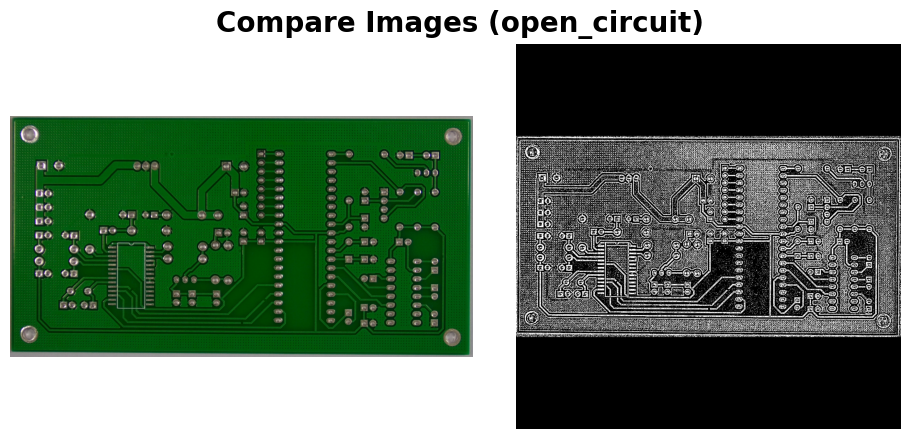

In [4]:
pcb_visualizer = PCBVisualizerforTF()
pcb_visualizer.plot_image_comparison(image_dataset, processed_dataset, 1)

Following an examination of the image preprocessing framework's functionality and the process of building a pipeline for image dataset processing, the following chapters will delve into the preprocessing pipeline's underlying code. They will explore the code's key elements in order to present its contributions to pipeline functionality.


---

<a id='Chapter-6'></a>
## 6. Code Framework Overview
Moving from interactive exploration of the image preprocessing framework, the focus now shifts to understanding the architecture behind it. 

**Framework Components**

The image preprocessing framework includes the following key-components:

- `ImagePreprocessor`: The main driver of the pipeline, managing the flow and application of preprocessing steps.
- `ClassInstancesSerializer`: A serialization utility that allows the saving and loading of pipelines.
- `StepBase`:  An abstract base class that defines the blueprint for all preprocessing stages.
- Preprocessing Steps: Concrete  child classes of `StepBase` that each encapsulate a specific preprocessing function, such as AdaptiveHistogramEqualizer.

**Understanding the Structure with UML**

The attached UML (Unified Modeling Language) diagram visually breaks down these components and their relationships. This high-level overview serves as a map to navigate the interactions within the framework. To simplify the visual representation of the Image Preprocessing Framework only public methods and attributes are shown in the diagram.

![UML Diagram](./related/image_preprocessing_uml.png)

In the diagram, it is visible how `ImagePreprocessor` orchestrates the sequence of steps, while `ClassInstancesSerializer` handles the serialization of instances/pipeline. `StepBase` outlines the structure that each preprocessing step must adhere to, ensuring consistency and reliability.

**Preparing for Deeper Dives**

The next sections will go over each component depicted in the UML diagram. This includes a look at how the `ImagePreprocessor` controls the preprocessing pipeline, a look at `StepBase` and structure of it's subclasses, and a look at the serialization possibilities provided by `ClassInstancesSerializer`.


---

<a id='Chapter7'></a>
## 7. Understanding the ImagePreprocessor Class
The `ImagePreprocessor` class is the primary component of the Image Preprocessing Framework, managing the pipeline, consisting of preprocessing steps for PCB images. The class is defined in the [image_preprocessing.py](../image_preprocessor.py) module.

The `ImagePreprocessor` class has the following public attributes and methods at its core:

**Attributes**:

- `pipeline`: A sequence of steps, derived from `StepBase`, that are executed on image data.
- `serializer`: A `ClassInstancesSerializer` instance responsible for saving and loading the pipeline configuration.

**Methods**:

- `set_pipe`: Establishes the preprocessing steps in the pipeline.
- `pipe_append`: Allows for adding a step to the pipeline.
- `pipe_pop`: Removes and returns the last step from the pipeline
- `process`: Applies the pipeline to an image dataset in sequence.
- `save_pipe_to_json` and `load_pipe_from_json`: Methods for serialization and deserialization, crucial for maintaining the pipeline’s configuration.
- `load_randomized_pipe_from_json`: Similar to `load_pipe_from_json`, but allows also for randomization of the preprocessing steps arguments.

**Functionality**

The `ImagePreprocessor` class methodically manages a series of image preprocessing steps, specifically designed for PCB images. It facilitates the flexible assembly and alteration of the processing sequence, providing structured and repeatable image transformations. It has serialization features ensuring for efficient saving and loading of pipeline configurations.

To test the functionality and reliability of the `ImagePreprocessor` a test suite was developed. This test suite can also be used to gain deeper insights into the implementation of the class. The test suite is defined in the [image_preprocessing_test.py](../tests/image_preprocessing_test.py) module.

The `ImagePreprocessor` enforces the use of StepBase subclasses, ensuring a standardized approach to process images within a pipeline. Building on this, the focus of the next chapter shifts to the `StepBase` class, which serves as the foundation for each preprocessing step. This chapter will provide details about the class and explain how it defines the structure and functionality of each step in the pipeline.



---

<a id='Chapter8'></a>
## 8. Understanding the StepBase Class
The `StepBase` class is the next fundamental component of the Image Preprocessing Framework, acting as a blueprint for each preprocessing step applied to PCB images. This class is defined in the [step_base.py](../preprocessing_steps/step_base.py) module.

The `StepBase` class has the following public attributes and methods at its core:

**Attributes:**
- `default_output_datatypes`:(Instance Attribute) Dictates the default data types for the output of the preprocessing steps, with image data typically as tf.uint8 and target data as tf.int8.
- `arguments_datatype`: (Class Attribute) Specifies the expected data types for the arguments of each preprocessing step.
- `name`: (Class Attribute) Acts as a unique identifier for each preprocessing step.
- `output_datatypes`: Dictates the data types for the output of the specific preprocessing step. Defaults to `default_output_datatypes`.
- `parameters`: Holds the parameters necessary for the specific preprocessing functionality.

**Methods:**
- `process_step`: (Abstract Method) To be implemented in child classes, defining the specific preprocessing operations.
- `_tensor_pyfunc_wrapper` and `_nparray_pyfunc_wrapper` (private methods): Static methods acting as decorators for mapping the tensor or nparray representation of the image into the preprocessing step method. They ensure a correct mapping of TensorFlow datasets to the related method.

**Functionality**

The `StepBase` class enforces a structured approach, requiring child classes to implement the `process_step` method and specify `arguments_datatype` and `name`.
It provides decorators for flexibility in implementing preprocessing steps as Python functions working with either NumPy arrays or Tensors.
The class facilitates the integration of preprocessing steps within the image processing pipeline, emphasizing modularity and customization.

A comprehensive test suite, essential for ensuring the robustness and functionality of the `StepBase` class, can be found in [step_base_test.py](../tests/step_base_test.py).

The next chapter shifts the focus to practical implementation of preprocessing steps. It presents an interactive documentation for the development and integration of custom image preprocessing steps into the pipeline.


---

<a id='Chapter9'></a>
## 9. Constructing Custom Preprocessing Step
This chapter provides guidance on constructing a custom preprocessing step, with a specific focus on the process of integrating a new step into an existing image preprocessing pipeline. The objective is to integrate a `PixelOffseter` preprocessing step into the image preprocessing framework and include it to the already existing pipeline from **Chapter???**. The following steps outline the procedure:

1. Create a python file called pixel_offsetting.py in the [single_steps](../preprocessing_steps/single_steps/) folder.
2. Insert the provided code into this file. The code defines a class `PixelOffseter` derived from `StepBase`, which applies an offset to each pixel in an image tensor:

```python
import tensorflow as tf
from source.image_preprocessing.preprocessing_steps.step_base import StepBase

class PixelOffseter(StepBase):
    """A preprocessing step that applies an offset to each pixel in an image tensor.
       The default offset value is 10."""

    arguments_datatype = {'offset': int}
    name = 'Pixel Offseter'

    def __init__(self, offset=10):
        """Initializes the PixelOffseter object for integration into an image preprocessing pipeline.

           Args:
               offset (int): The value used to offset each pixel in the image tensor. Default is 10.
        """
        super().__init__(locals())
    
    @StepBase._tensor_pyfunc_wrapper
    def process_step(self, image_tensor):
        image_tensor = tf.cast(image_tensor, self.output_datatypes['image'])
        offset_value = tf.constant(self.parameters['offset'], self.output_datatypes['image'])
        offset_image = image_tensor + offset_value
        return offset_image

```

3. Integrate the `PixelOffseter` class into the existing set of preprocessing steps. This is achieved by including an import statement in the [__init__.py](../preprocessing_steps/__init__.py) file:

```python
from source.image_preprocessing.preprocessing_steps.single_steps.pixel_offsetting import PixelOffseter
```

4. Add a key-value pair for the new preprocessing step in the mapping dictionary within [step_class_mapping.py](../preprocessing_steps/step_class_mapping.py):
```python
    'Pixel Offseter': steps.PixelOffseter
```

5. Add the *Pixel Offseter* object to the JSON file [template.json](../pipelines/template.json) with the specified *offset* parameter:

    <i>"Pixel Offseter": {"offset": [10]}</i>

6. Modify [single_step_test.py](../tests/single_step_test.py) to test the `PixelOffseter` step with designated step parameters:
```python
#TODO Select Step to test here!
from source.image_preprocessing.preprocessing_steps import PixelOffseter as StepToTest
STEP_PARAMETERS = {'offset': 30}
```
7. Run the test script to confirm that all tests pass.
8. After successful testing, incorporate the newly developed step into the preprocessing pipeline:

In [46]:
importlib.reload(steps)
# preprocessor.pipe_append(steps.PixelOffseter(offset=30))  #TODO Uncomment this line.

In [ ]:
# Visualize results of the modified pipeline
processed_dataset = preprocessor.process(image_dataset)
pcb_visualizer.plot_image_comparison(image_dataset, processed_dataset, 1)


Having established the methodology for constructing a custom preprocessing step such as the `PixelOffseter`, the following chapter focuses on the  pipeline's serialization capability of the `ImagePreprocessor`. This chapter will look at how the pipeline can be serialized to make saving and reloading configurations easier for efficient reuse and sharing. Moreover, this chapter will introduce the functionality of loading a pipeline with randomized parameters.


---

<a id='Chapter10'></a>
## 10. Serialization of the Pipeline with JSON
This chapter focuses on the `ImagePreprocessor` class and its capability to serialize the pipeline configuration using JSON. This feature is crucial for saving and retrieving pipeline configurations as required.

**Save and reload Pipeline**

In the previous chapter, a pipeline was successfully constructed. The subsequent step involves storing this pipeline to JSON.

In [6]:
json_path = os.path.join(os.path.curdir,  'related', 'pipeline.json')
preprocessor.save_pipe_to_json(json_path)

The pipeline was stored to [pipeline.json](./related/pipeline.json). Before reloading the pipeline modifications to the pipeline, including alterations in argument values, the sequence of steps, or the application of different steps, are welcome. It is important to note that the order of the preprocessing step entries in the JSON file corresponds to their sequence in the pipeline. For additional preprocessing steps and argument options, refer to the file [template.json](../pipelines/template.json). After finalizing these modifications, the `ImagePreprocessor` is capable of loading the updated pipeline.

In [36]:
preprocessor.load_pipe_from_json(json_path)
print(preprocessor.get_pipe_code_representation())

[
    GaussianBlurFilter(kernel_size=(7, 7), sigma=2.0),
    AdaptiveHistogramEqualizer(clip_limit=2.8424100152654432, tile_gridsize=(8, 8)),
    RGBToGrayscale(),
    AdaptiveThresholder(block_size=15, c=-1.7849445219278424),
    ShapeResizer(desired_shape=(1000, 1000), resize_method=nearest)
]


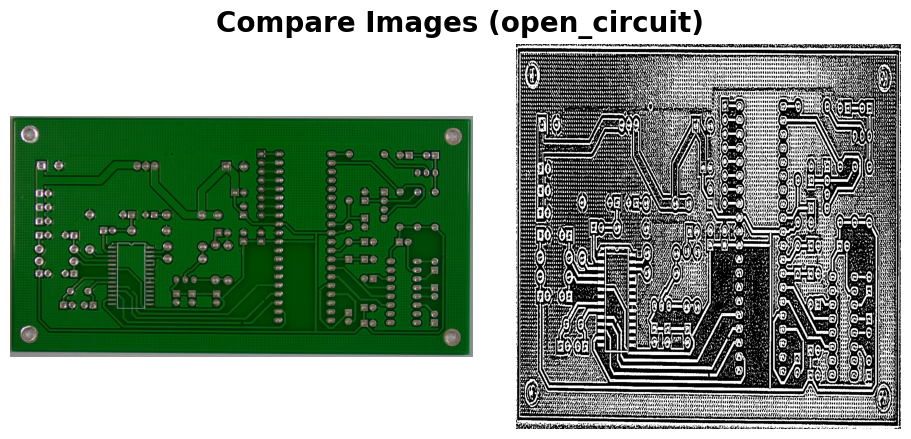

In [39]:
# Visualize results of the modified pipeline
processed_dataset = preprocessor.process(image_dataset)
pcb_visualizer.plot_image_comparison(image_dataset, processed_dataset, 1)

**Pipeline Randomization**

A significant challenge in the context of preprocessing PCB images is identifying appropriate parameters for each preprocessing step. Manually adjusting parameters within preprocessing steps is time consuming and inefficient. To improve this process, an additional feature that makes hyperparameter tuning easier was implemented. The feature developed allows the specification of parameter ranges or distributions.


This feature involves using the JSON file to specify ranges or distribution of the parameters. The entry below can be copied into [pipeline.json](./related/pipeline.json). 

    {
        "Gaussian Blur Filter": {
            "kernel_size": [[3,3],[5,5],[7,7]],
            "sigma": {"distribution": "poisson", "lam": 3}
        },
        "Adaptive Histogram Equalizer": {
            "clip_limit": {"distribution": "uniform", "low": 0, "high": 3},
            "tile_gridsize": [[3,3],[5,5],[8,8]]
        },
        "RGB To Grayscale": {},
        "Adaptive Thresholding": {
            "block_size": "[15]*10 + [13]*8 + [17]*6",
            "c": {"distribution": "gaussian", "loc": -2, "scale": 1}
        },
        "Shape Resizer": {
            "desired_shape": "[[1000,1000]]*5 + [[1500,1500]]*4",
            "resize_method": ["bilinear", "bilinear", "nearest", "bicubic"]
        }
    }

    
The JSON entry of above for the randomized image preprocessing pipeline allows the definintion of parameter ranges and distributions for each preprocessing step:

- Parameter Range with List: Parameters can be specified as a list of values. For example, *"kernel_size": [[3,3],[5,5],[7,7]]* in *"Gaussian Blur Filter"* allows the `ImagePreprocessor` to randomly choose one of these kernel sizes. 
- Parameter Range with String: Certain parameters can be defined using a string that represents a weighted list of values. For instance, <i>"block_size": "[15]*10 + [13]*8 + [17]*6</i>" in *"Adaptive Thresholding"* creates a weighted list of block sizes for the system to select from. The [parse_and_repeat_test.py](../../utils/tests/parse_and_repeat_test.py) file provides additional insights.
- Parameter Distribution: Parameters can also be defined using a statistical distribution. For example, *"sigma": {"distribution": "poisson", "lam": 3}* sets *sigma* in *"Gaussian Blur Filter"* to follow a Poisson distribution with lambda = 3. Note, when specifying distributions only parameters of type float or int are allowed. The [get_sample_from_distribution_test.py](../../utils/tests/get_sample_from_distribution_test.py) file provides additional insights.

Modifications to the entries in the JSON file are permissible and encouraged. After making the desired changes, the updated pipeline configuration can be displayed and utilized for image preprocessing. 
    

In [ ]:
# Run this cell several times
preprocessor.load_randomized_pipe_from_json(json_path)
print(preprocessor.get_pipe_code_representation())

Upon explorint the concepts of pipeline serialization and randomization, the next chapter will introduce the underlying class that manages these processes in support of the `ImagePreprocessor`. This chapter aims to provide an overview of the `ClassInstancesSerializer` class's structure.


---

<a id='Chapter11'></a>
## 11. Understanding the ClassInstancesSerializer 
The `ClassInstancesSerializer` is another fundamental component of the Image Preprocessing Framework that handles the serialization and deserialization of class instances or in this case the pipeline. It converts class instances and arguments to JSON and vice versa, making it especially useful for hyperparameter tuning and model experimentation.

The `ClassInstancesserializer` class has the following public attributes and methods at its core:

**Attributes:**

- `KEY_SEPARATOR`: A separator used to create unique keys for JSON objects, that allows for the inclusion of multiple entries of the same class within a JSON file.
- `instance_mapping`: A dictionary linking class names to the actual class objects, enabling instantiation from stored configurations.

**Methods:**
- `save_instance_list_to_json`: Serializes a list of class instances into a JSON file.
- `get_instances_from_json`: Reconstructs class instances with their specific parameters from a JSON file.
- `get_randomized_instances_from_json`: Deserializes instances with parameters that are randomly chosen within defined ranges or distributions.

**Functionality**

The `ClassInstancesSerializer` is built on the premise that class instances must contain a `parameters` attribute, and optionally, an `arguments_datatype` for proper serialization and deserialization. The `instance_mapping` attribute is vital for initializing instances of mapped classes from configurations stored in JSON. This is because in addition to managing parameters, the `ClassInstancesSerializer` employs recursive type conversion to ensure that data types align correctly with class attributes. This step is fundamental because JSON serialization of the pipeline in specific cases strips away the specificity of data types. More insights on the data type conversion of the image preprocessing framework can be found in [recursive_type_conversion_test.py](../../utils/tests/recursive_type_conversion_test.py).

For comprehensive implementation details, including how instances are serialized, deserialized, and instantiated with their parameters, the test framework, found in [class_instances_serializer_test.py](../../utils/tests/class_instance_serializer_test.py) of the image preprocessor is referenced. It provides examples and scenarios that demonstrate the serializer's capabilities in action.




---

<a id='Chapter13'></a>
## 12. Conclusion and Further Steps

This documentation describes the structure of the image preprocessing framework developed for the task of PCB defect detection. It presents an organized framework for the application and experimentation of various preprocessing steps, whose contributions are expected to be effective in improving image data quality, which is crucial in ML image analysis. The framework has evolved into a tool that not only supports the storage and loading of preprocessing configurations, but also allows for parameter fine-tuning, which is made possible by the ability to randomize parameters.

**Areas of Improvement**

While the framework is expected to be a robust tool, opportunities for improvements are given. A feature for automating the selection and ordering of preprocessing steps could significantly increase efficiency in finding an appropriate pipeline. Using TensorFlow's mapping function to optimize processing within `ImagePreprocessor` would speed up operations and potentially lead to performance gains.

**Adapting for Wider Use**

While the framework was initially designed to detect PCB defects, it may be applicable to other image-based ML tasks as well. Its design could potentially benefit different areas of image analysis with ML, but careful adaptation and testing would be required.

**Next steps**

Moving forward, the focus will shift to building the PCB Defect Detector Model. This step involves creating a model that makes the most of the developed image preprocessing framework for accurate defect detection on images. This means creating and training a model that uses the processed image data to detect defects precisely.



---

## Author's Q&A
**Q: What type of dataset is used in the PCB Defect Detection Project?**

The dataset, called `image_dataset` from this yupiter notebook, is a TensorFlow dataset in the form of `tf.data.Dataset`. It consist of tuples, each containing an image as tensor of type `tf.uint8` and its associated defect category code of type `tf.int8`. This dataset is then prefetched to improve data loading efficiency during preprocessing and model training.

**Q: What influenced the decision to use TensorFlow's dataset format to represent image datasets in the preprocessing framework?**

A: The primary motivation for using TensorFlow datasets (TDFS) in the form of `tf.data.Dataset` objects for image dataset representation is their inherent preformance characteristics and performance optimization features. These characteristics are very useful when dealing with great amounts of data. One cornerstone of TensorFlow's performance optimization, also used in the image preprocessing framework, is the parallelization of operations. This can be done by TensorFlow's data API's `map` function, intended to process data elements concurrently. This parallel processing considerably reduces the time required for data preparation and transformation.[[7]](#references). To demonstrate the efficiency, consider the execution time of the yupiter notebook python cells, that processed 693 images from the dataset using pipelines consisting of 5 to 6 preprocessing steps.

However, while TensorFlow's dataset format provides significant performance benefits, it also presents debugging challenges due to its complex graph execution model. As a result, when implementing a preprocessing framework with TensorFlow, careful software development and thorough testing are required to ensure the the framework is working and to prevent difficulties.

**Q: Why are images and targets kept together in the preprocessing pipeline?**

A: Images and their matching targets are processed as pairs in the preprocessing pipeline to guarantee that each image remains correctly matched with its target. This strategy eliminates the possibility of an image being incorrectly linked with another target. Although this is a point of ongoing discussion, the strategy is being maintained for data integrity. In the development of the PCB defect detector model, the possibility of improving this aspect will be reconsidered to determine if separate image and target processing is more useful.

**Q: Why was the JSON format chosen for serialization in the ClassInstancesSerializer?**

A: Three significant considerations impacted the choice to use JSON in the `ClassInstancesSerializer`:

- Editable: The static modifiability of JSON is a critical characteristic. It enables fast and direct changes to parameters, ranges, or distributions, which is not possible with formats such as pickle, which generates binary files.
- Readability and Clarity: JSON stands out for its ease of use and widespread acceptance, allowing for transparent serialized data management. In comparison, XML, while still human readable, is more verbose and less user-friendly.
- Hierarchical Data Representation: Because the configuration of the preprocessing pipeline is inherently complicated, it benefits from a format that can effectively describe hierarchical structures. JSON outperforms CSV in this aspect, whereas CSV is better suited for simpler, tabular data and can become tedious with complex nested data.

In conclusion, JSON was chosen because of its simplicity of mopdification, readability, and flexibility to express complicated hierarchical data structures. These characteristics make it a solid option for serialized data management within the image preprocessing framework.

**Q: What color channels are accepted in the image preprocessing framework?**

A: The image preprocessing framework primarly focuses on grayscale and RGB color channels. This because: 
- Widespread use of RGB and grayscale: RGB and grayscale are the most widely used color channels in image processing, making them practical defaults for many applications.[[7][8]](#references).
- Ease of visual inspection: Matplotlib, a popular Python package, provides handy methods for showing pictures in grayscale and RGB, making the visualization process easier during preprocessing.
- Prevent unnecessary complication: Adding more color representations would complicate the framework inappropriately, which could impact performance and usability.

Furthermore, the framework's preprocessing steps are intended to accept both grayscale and RGB inputs. They must output data in the same color space as the input, unless a specific step requires color channel conversion. This consistency in input and output color spaces guarantees that the preprocessing pipeline is uniform. However, if a preprocessing step necessitates a temporary conversion to a different color space for processing, it must convert the data back to its original color space before outputting. This requirement is verified using a framework's test suite described in [single_step_test.py](../tests/single_step_test.py). The test suite ensures that a step complies with the aforementioned criteria before it is integrated into the pipeline.

**Q: How are the input and output data types managed in an image preprocessing pipeline?**

A: In the image preprocessing pipeline, the handling of data types for images and targets is carefully managed by each preprocessing step to ensure compatibility and efficiency:

- Default Data Types:  The pipeline primarily uses tf.uint8 for images and tf.int8 for targets, as outlined in the [step_base.py](../preprocessing_steps/step_base.py) file. 
- Acceptance of Input Data Types: All preprocessing steps must accept images in the tf.uint8 default data type. This requirement is essential for mantaining constistency when executing multiple steps within a pipeline and is tested by the test suite in [single_step_test.py](../tests/single_step_test.py).
- Variability in Accepted Data Types: The specific image data types that can be accepted as inputs may vary depending on the implementation of each preprocessing step. In the case that a step integrates an OpenCV function, for instance, the accepted input data types would correspond to those that OpenCV supports.
- Output Data Type of Images: The output data type for images from each preprocessing step can either adhere to the default (tf.uint8) or be a specific data type defined by the step itself. This is also tested in the previously stated test suite. This flexibility allows for steps that might require different data types due to the nature of their processing. However, any change from the default data type must be specified in detail in the step's docstring. 

Overall, the pipeline's design balances the need for standardization (via default data types) with the flexibility to accommodate specific preprocessing step requirements. This method guarantees that the pipeline is robust, modular, and capable of effectively handling a wide range of preprocessing tasks.

**Q: In the JSON configuration of the preprocessing pipeline, is there a method to include the same preprocessing step multiple times without causing conflicts?**

 While it is relatively rare to encounter such a scenario, it is indeed possible to include the same preprocessing step multiple times within a JSON-configured preprocessing pipeline. In this case, to avoid potential conflicts with the JSON format, a unique key naming mechanism is employed. This is where the method `_generate_unique_key_name method` of the `ClassInstancesSerializer` becomes crucial. The class is defined in [class_instances_serializer.py](../../utils/class_instances_serializer.py).

The following approach can be used:

1. Base Step Naming: Start with the base name of the preprocessing step (e.g., 'Standard Normalizer').
1. Applying `KEY_SEPARATOR`: Use the `KEY_SEPARATOR` from `ClassInstancesSerializer` to append a unique identifier. The `KEY_SEPARATOR` is typically '__'.
1. Unique Identifier: Assign a distinct identifier for each instance (e.g., '2', '3', etc.).

Example Configuration:

First instance: 'Standard Normalizer'  
Second instance: 'Standard Normalizer__2'  
Third instance: 'Standard Normalizer__3'  

This approach allows each preprocessing step to be uniquely identified, allowing multiple occurrences of the same step to be included in the pipeline without conflict. 

**Q: How does the ImagePreprocessor differ from and compare to the Scikit-learn Pipeline?**

The `ImagePreprocessor` of the image preprocessing framework is inspired on scikit-learn's `Pipeline`, although its focus and functionality differ. It processes image data through a list of steps, defined in the attribute `pipeline` using a single `process` method, ensuring a consistent, non-adaptive flow. This approach differs from scikit-learn's `Pipeline`, which not only analyzes data but also learns from it using fit and transform methods, allowing for data-driven dynamic adaptability. As previously stated in the chapter (**BlaBla**.)

Furthermore, the ImagePreprocessor serves as the key orchestrator in its structure, handling a list of processing steps, collectively referred to as a pipeline, that are specialized for image processing. Scikit-learn's Pipeline, on the other hand, orchestrates data processing itself by merging fitting and transformation. 

This distinction highlights the `ImagePreprocessor`'s focus on executing a fixed sequence of image-specific preprocessing operations, whereas scikit-learn's `Pipeline`` provides a more flexible, general and integrated approach capable of learning from and adapting to the data it processes.



---

<a id='references'></a>
## References

[1] G. Mahalingam, K. M. Gay, K. Ricanek, "PCB-METAL: A PCB Image Dataset for Advanced Computer Vision Machine Learning Component Analysis", _IEEE Xplore_, 2019. [Online]. Available: https://ieeexplore.ieee.org/document/8757928. Accessed December 4, 2023.

[2] J. Nelson, "What is Image Preprocessing and Augmentation?" _Roboflow Blog_, Jan 26, 2020. [Online]. Available: https://blog.roboflow.com/why-preprocess-augment/. Accessed December 4, 2023.

[3] Isahit, "What is the purpose of image preprocessing in deep learning?", Oct 11, 2022. _Isahit_. [Online]. Available: https://www.isahit.com/blog/what-is-the-purpose-of-image-preprocessing-in-deep-learning. Accessed December 4, 2023.

[4] S. Krig, "Image Pre-Processing," in _Computer Vision Metrics_, Springer, pp. 39–83, First Online: May 26, 2014. [Online]. Available: https://link.springer.com/chapter/10.1007/978-1-4302-5930-5_2. Accessed December 4, 2023.

[5] N. Elter, "PCB Defect dataset," Kaggle, updated Aug 2023. Available: https://www.kaggle.com/datasets/norbertelter/pcb-defect-dataset. Accessed December 4, 2023.

[6] Scikit-learn developers, "Pipeline: scikit-learn," Scikit-learn stable documentation, 2023. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html. Accessed December 4, 2023.

[7] TensorFlow developers, "Better performance with the tf.data API," TensorFlow Core v2.14.0 documentation, 2023. [Online]. Available: https://www.tensorflow.org/guide/data_performance. Accessed December 4, 2023.

[8] Scaler Topics, "Color Spaces in Image Processing," Scaler Topics, 2023. [Online]. Available: https://www.scaler.com/topics/color-spaces-in-image-processing/. Accessed December 4, 2023.

[9] Dynamsoft Blog, "Image Processing 101 Chapter 1.3: Color Space Conversion," Dynamsoft Blog, May 24, 2019. [Online]. Available: https://www.dynamsoft.com/blog/insights/image-processing-101-color-space-conversion/. Accessed December 4, 2023.
